In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00


In [2]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

import pandas as pd

from PIL import Image
import requests
from io import BytesIO
import urllib

from datasets.utils.file_utils import get_datasets_user_agent

import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/My Drive/ErwModul_24/data/wit_v1.test.all-00000-of-00005.tsv'
folder_path = '/content/drive/My Drive/ErwModul_24'


Mounted at /content/drive


In [4]:
# from https://gist.github.com/carlopires/1262033/c52ef0f7ce4f58108619508308372edd8d0bd518
iso_639_choices = dict([('ab', 'Abkhaz'),
('aa', 'Afar'),
('af', 'Afrikaans'),
('ak', 'Akan'),
('sq', 'Albanian'),
('am', 'Amharic'),
('ar', 'Arabic'),
('an', 'Aragonese'),
('hy', 'Armenian'),
('as', 'Assamese'),
('av', 'Avaric'),
('ae', 'Avestan'),
('ay', 'Aymara'),
('az', 'Azerbaijani'),
('bm', 'Bambara'),
('ba', 'Bashkir'),
('eu', 'Basque'),
('be', 'Belarusian'),
('bn', 'Bengali'),
('bh', 'Bihari'),
('bi', 'Bislama'),
('bs', 'Bosnian'),
('br', 'Breton'),
('bg', 'Bulgarian'),
('my', 'Burmese'),
('ca', 'Catalan; Valencian'),
('ch', 'Chamorro'),
('ce', 'Chechen'),
('ny', 'Chichewa; Chewa; Nyanja'),
('zh', 'Chinese'),
('cv', 'Chuvash'),
('kw', 'Cornish'),
('co', 'Corsican'),
('cr', 'Cree'),
('hr', 'Croatian'),
('cs', 'Czech'),
('da', 'Danish'),
('dv', 'Divehi; Maldivian;'),
('nl', 'Dutch'),
('dz', 'Dzongkha'),
('en', 'English'),
('eo', 'Esperanto'),
('et', 'Estonian'),
('ee', 'Ewe'),
('fo', 'Faroese'),
('fj', 'Fijian'),
('fi', 'Finnish'),
('fr', 'French'),
('ff', 'Fula'),
('gl', 'Galician'),
('ka', 'Georgian'),
('de', 'German'),
('el', 'Greek, Modern'),
('gn', 'Guaraní'),
('gu', 'Gujarati'),
('ht', 'Haitian'),
('ha', 'Hausa'),
('he', 'Hebrew (modern)'),
('hz', 'Herero'),
('hi', 'Hindi'),
('ho', 'Hiri Motu'),
('hu', 'Hungarian'),
('ia', 'Interlingua'),
('id', 'Indonesian'),
('ie', 'Interlingue'),
('ga', 'Irish'),
('ig', 'Igbo'),
('ik', 'Inupiaq'),
('io', 'Ido'),
('is', 'Icelandic'),
('it', 'Italian'),
('iu', 'Inuktitut'),
('ja', 'Japanese'),
('jv', 'Javanese'),
('kl', 'Kalaallisut'),
('kn', 'Kannada'),
('kr', 'Kanuri'),
('ks', 'Kashmiri'),
('kk', 'Kazakh'),
('km', 'Khmer'),
('ki', 'Kikuyu, Gikuyu'),
('rw', 'Kinyarwanda'),
('ky', 'Kirghiz, Kyrgyz'),
('kv', 'Komi'),
('kg', 'Kongo'),
('ko', 'Korean'),
('ku', 'Kurdish'),
('kj', 'Kwanyama, Kuanyama'),
('la', 'Latin'),
('lb', 'Luxembourgish'),
('lg', 'Luganda'),
('li', 'Limburgish'),
('ln', 'Lingala'),
('lo', 'Lao'),
('lt', 'Lithuanian'),
('lu', 'Luba-Katanga'),
('lv', 'Latvian'),
('gv', 'Manx'),
('mk', 'Macedonian'),
('mg', 'Malagasy'),
('ms', 'Malay'),
('ml', 'Malayalam'),
('mt', 'Maltese'),
('mi', 'Māori'),
('mr', 'Marathi (Marāṭhī)'),
('mh', 'Marshallese'),
('mn', 'Mongolian'),
('na', 'Nauru'),
('nv', 'Navajo, Navaho'),
('nb', 'Norwegian Bokmål'),
('nd', 'North Ndebele'),
('ne', 'Nepali'),
('ng', 'Ndonga'),
('nn', 'Norwegian Nynorsk'),
('no', 'Norwegian'),
('ii', 'Nuosu'),
('nr', 'South Ndebele'),
('oc', 'Occitan'),
('oj', 'Ojibwe, Ojibwa'),
('cu', 'Old Church Slavonic'),
('om', 'Oromo'),
('or', 'Oriya'),
('os', 'Ossetian, Ossetic'),
('pa', 'Panjabi, Punjabi'),
('pi', 'Pāli'),
('fa', 'Persian'),
('pl', 'Polish'),
('ps', 'Pashto, Pushto'),
('pt', 'Portuguese'),
('qu', 'Quechua'),
('rm', 'Romansh'),
('rn', 'Kirundi'),
('ro', 'Romanian, Moldavan'),
('ru', 'Russian'),
('sa', 'Sanskrit (Saṁskṛta)'),
('sc', 'Sardinian'),
('sd', 'Sindhi'),
('se', 'Northern Sami'),
('sm', 'Samoan'),
('sg', 'Sango'),
('sr', 'Serbian'),
('gd', 'Scottish Gaelic'),
('sn', 'Shona'),
('si', 'Sinhala, Sinhalese'),
('sk', 'Slovak'),
('sl', 'Slovene'),
('so', 'Somali'),
('st', 'Southern Sotho'),
('es', 'Spanish; Castilian'),
('su', 'Sundanese'),
('sw', 'Swahili'),
('ss', 'Swati'),
('sv', 'Swedish'),
('ta', 'Tamil'),
('te', 'Telugu'),
('tg', 'Tajik'),
('th', 'Thai'),
('ti', 'Tigrinya'),
('bo', 'Tibetan'),
('tk', 'Turkmen'),
('tl', 'Tagalog'),
('tn', 'Tswana'),
('to', 'Tonga'),
('tr', 'Turkish'),
('ts', 'Tsonga'),
('tt', 'Tatar'),
('tw', 'Twi'),
('ty', 'Tahitian'),
('ug', 'Uighur, Uyghur'),
('uk', 'Ukrainian'),
('ur', 'Urdu'),
('uz', 'Uzbek'),
('ve', 'Venda'),
('vi', 'Vietnamese'),
('vo', 'Volapük'),
('wa', 'Walloon'),
('cy', 'Welsh'),
('wo', 'Wolof'),
('fy', 'Western Frisian'),
('xh', 'Xhosa'),
('yi', 'Yiddish'),
('yo', 'Yoruba'),
('za', 'Zhuang, Chuang'),
('zu', 'Zulu'),])

In [5]:
df=pd.read_csv(path,sep='\t')
dataset = df.to_dict('index')
df.head()

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description
0,fi,https://fi.wikipedia.org/wiki/Stegosaurus,https://upload.wikimedia.org/wikipedia/commons...,Stegosaurus,Kuvia,Stegosaurus / Kuvia,NaN,English: Fossil dorsal plate from a Stegosauru...,NaN,image/jpeg,2003,1590,False,False,False,"Stegosaurus oli suuri kasvinsyöjädinosaurus, j...",NaN
1,nl,https://nl.wikipedia.org/wiki/Vernajoul,http://upload.wikimedia.org/wikipedia/commons/...,Vernajoul,Geografie,Vernajoul / Geografie,NaN,Français&#160;: Carte des communes françaises:...,Detailkaart van de gemeente,image/png,605,756,False,False,False,Vernajoul is een gemeente in het Franse depart...,"De oppervlakte van Vernajoul bedraagt 9,0 km²,..."
2,cs,https://cs.wikipedia.org/wiki/Trolejbusov%C3%A...,https://upload.wikimedia.org/wikipedia/commons...,Trolejbusová doprava v Žilině,NaN,Trolejbusová doprava v Žilině,Žilinský trolejbus Škoda 14Tr,English: trolleybus transport,NaN,image/jpeg,336,454,False,False,False,"Žilina je jedním z pěti slovenských měst, kde ...","Žilina je jedním z pěti slovenských měst, kde ..."
3,en,https://en.wikipedia.org/wiki/Cereal,http://upload.wikimedia.org/wikipedia/commons/...,Cereal,NaN,Cereal,Various cereals and their products,"English: Oats, barley, and some products made ...",NaN,image/jpeg,1825,2700,False,True,True,A cereal is any grass cultivated for the edibl...,A cereal is any grass cultivated (grown) for t...
4,en,https://en.wikipedia.org/wiki/Roger_B._Chaffee...,https://upload.wikimedia.org/wikipedia/commons...,Roger B. Chaffee Planetarium,NaN,Roger B. Chaffee Planetarium,NaN,Roger B. Chaffee Planetarium,NaN,image/jpeg,2437,3784,False,True,False,"The Roger B. Chaffee Planetarium, named for as...","The Roger B. Chaffee Planetarium, named for as..."


In [6]:
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

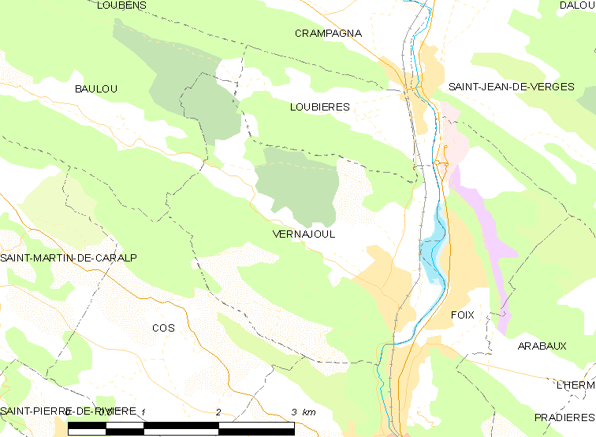

Title is: Vernajoul
Context is: Vernajoul is een gemeente in het Franse departement Ariège en telt 661 inwoners. De plaats maakt deel uit van het arrondissement Foix.
Language is: Dutch
Caption is: Français&#160;: Carte des communes françaises: Vernajoul English: Map commune FR insee code 09329.png


In [7]:
image_url = dataset[1]['image_url']
language_code = dataset[1]['language']
language = iso_639_choices[language_code]
page_title = dataset[1]['page_title']
page_context = dataset[1]['context_page_description']
if pd.isna(dataset[1]['caption_reference_description']):
  caption_reference = dataset[1]['caption_attribution_description']
else:
  caption_reference = dataset[1]['caption_reference_description']
try:
  request = urllib.request.Request(
    image_url,
    data=None,
    headers={"user-agent": get_datasets_user_agent()},
  )
  with urllib.request.urlopen(request, timeout=None) as req:
    image = Image.open(BytesIO(req.read()))
except Exception:
  image = None
display(image.resize((596, 437)))

print("Title is: {}".format(page_title))
print("Context is: {}".format(page_context))
print("Language is: {}".format(language))
print("Caption is: "+ caption_reference)

In [8]:
prompt = "This is a image from a {} wikipedia page about {}. Here is a page description: \"{}\"\n Here is the description of the image: ".format(language, page_title, page_context)

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=50)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Both `max_new_tokens` (=50) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


vernajoul, france, map, location, location, location, location, location, location, location, location, location, location, location, location, location, location, location, location, location, location, location, location, location


In [9]:
entry_limit = 200
entry_list = []
for data_i in dataset:
  data = dataset[data_i]
  image_url = data['image_url']
  if data['language'] not in iso_639_choices:
    continue
  else:
    language = iso_639_choices[data['language']]
  page_title = data['page_title']
  page_context = data['context_page_description']
  if pd.isna(data['caption_reference_description']):
    continue
  else:
    caption_reference = data['caption_reference_description']
  try:
    request = urllib.request.Request(
      image_url,
      data=None,
      headers={"user-agent": get_datasets_user_agent()},
    )
    with urllib.request.urlopen(request, timeout=None) as req:
      image = Image.open(BytesIO(req.read()))
  except Exception:
    continue
  entry = {}
  entry['image'] = image
  entry['language'] = language
  entry['caption_ref'] = caption_reference
  entry['page_title'] = page_title
  entry['page_context'] = page_context
  entry_list.append(entry)
  if len(entry_list) >= entry_limit:
    break


In [10]:
generated_texts = []
for entry in entry_list:
  try:
    prompt = "This is a image from a {} wikipedia page about {}. Here is a page description: \"{}\"\n Here is the description of the image: ".format(entry['language'], entry['page_title'], entry['page_context'])

    inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

    generated_ids = model.generate(**inputs, max_new_tokens=20)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
    generated_texts.append(generated_text)
    entry['gen_text'] = generated_text
  except Exception as e:
    print(e)
    print("Problem occurred. Proceeds with next entry.")
    continue


Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `ma

CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.

Problem occurred. Proceeds with next entry.
CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.

Problem occurred. Proceeds with next entry.
CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.

Problem occurred. Proceeds with next entry.
CUDA error: d

In [11]:
for text in generated_texts:
  print(text)

"Žilina je jedním z pěti slovensk�
"A train on the tracks of a railway station. The train is a passenger train, and the
"This is a picture of a train station in the city of Shanghai. The train station is located
"This is a view of the Batignano train station in the Italian region of Toskana
"The Alps of the South or the Mountains of the North is a railway that runs along the coast
আরানমুলা ক
"Беренгария — первы
"Mark Louis Recchi is a professional Canadian hockey player on ice. He played at the highest level
"Lớp Mộc tặc hay l�
"Bona de Saboya, duquesa de Milán fue la segunda espos
"The Citronkanario is a small bird of the family of Fringed birds and a species
"The train is a passenger train, the station is a railway station, the trees are trees,
"Біріктіру арқы
"Kekaisaran Tadmur, adalah salah satu negara pecahan
"Argentina, officially the Republic of Argentina, is a sovereign state in South America, located
"The Pioneer Women's Memorial Garden is located in Kings Domain, Melbourne, A